In [1]:
from header import *

In [16]:
from header import *
import scipy.constants as cnst
import matplotlib.pyplot as plt
import math

# --- constants ---
#in units of angstroms and electron volts, where the prefactor 1/(4 pi epsilon0) has been absorbed into the definition of electric charge

#elementry charge squared
e2=(cnst.e**2/(4*np.pi*cnst.epsilon_0))/(cnst.eV*cnst.angstrom)

#bohr radius
r0=(4*np.pi*cnst.epsilon_0*cnst.hbar**2)/(cnst.angstrom*cnst.m_e*cnst.e**2)

#charge on the nuclius is emelentry charge units
Z=2

#reduced plancs constant
hbar=cnst.hbar/cnst.eV

#mass of electorn
me=cnst.m_e*cnst.angstrom**2/cnst.eV

#mass of alpha particsle
malpha=cnst.physical_constants["alpha particle mass"][0]*cnst.angstrom**2/cnst.eV

In [ ]:

#generator function of elements of N for hylleraas' basis states given J K M and one over two lambda or 'ootl'
def fN(J,K,M,ootl):
	if M==-2:
		return 0
	elif K%2 ==0:
		return (
			2*np.pi**2 
			* math.factorial(J+K+M+5) 
			* ootl**(J+K+M+6) 
			* (1/(M+2)) 
			* (1/(K+1) - 1/(K+3) - 1/(K+M+3) + (1/(K+M+5)))
		)
	else:
		return 0

#generator function of elements of C for hylleraas' basis states given J K M and one over two lambda or 'ootl'
def fC(J, K, M, ootl):
	if M==-2:
		return 0
	elif K%2==0:
		return (
			8*np.pi**2 
			* math.factorial(J+K+M+4) 
			* ootl**(J+K+M+5) 
			* (1/(M+2)) 
			* (1/(1+K)-1/(K+M+3))
		)
	else:
		return 0

#generator function of elements of T for hylleraas' basis states given J K M and one over two lambda or 'ootl'
def fT(j,j_prime,k,k_prime,m,m_prime,J,K,M,l,ootl):
	return (
		(hbar**2)/(2*me) * ( 
			2 * (
				(l**2)*fN(J,K,M,ootl) 
				- J*l*fN(J-1,K,M,ootl) 
				+ j*j_prime*fN(J-2,K,M,ootl) 
				+ k*k_prime*fN(J,K-2,M,ootl) 
				+ m* m_prime*fN(J,K,M-2,ootl)
				) 
			+(1/2)*(
				-M*l*(fC(J,K,M,ootl)-fC(J,K+2,M-2,ootl))
				+ (m*j_prime + m_prime*j)*(fC(J-1,K,M,ootl)-fC(J-1,K+2,M-2,ootl)) 
				+ (m*k_prime + m_prime*k)*(fC(J+1,K,M-2,ootl)-fC(J-1,K,M,ootl))
			)
		)
	)


In [8]:
subspace=Subspace(3)

a=2*me*malpha/(me+malpha)
b=

omega_1=4
omega_2=9

lmn1s=[]
lmn2s=[]

def N_func(n,n_prime,kappas):
        
    #usefull constand 1/2lambda ie 'one over two lambda'
    ootl=kappas*r0/(2*Z)

    j,k,m=jkms[n]
    j_prime,k_prime,m_prime=jkms[n_prime]
    J=j+j_prime
    K=k+k_prime
    M=m+m_prime
    return fN(J,K,M, ootl)
	
subspace.set_N_func(N_func)

def H_func(n,n_prime,kappas):
    
    #lambda
    l=Z/(kappas*r0)

    #usefull constand 1/2lambda ie 'one over two lambda'
    ootl=kappas*r0/(2*Z)

    j,k,m=jkms[n]
    j_prime,k_prime,m_prime=jkms[n_prime]
    J=j+j_prime
    K=k+k_prime
    M=m+m_prime
	
    return -Z*e2*fC(J,K,M, ootl)+e2*fN(J,K,M-1, ootl)+fT(j,j_prime,k,k_prime,m,m_prime,J,K,M, l,ootl)
	
subspace.set_H_func(H_func)

subspace.set_params(1000,[np.linspace(0.5,3,1000)])

In [9]:
subspace.make_N_mats()
subspace.make_H_mats()
subspace.find_N_eigens()
subspace.make_Y_mats()
subspace.make_invs_sqrt_beta_mats()
subspace.make_P_mats()
subspace.find_P_eigens()
subspace.find_energy_levels()

Constructing the N matrices.
Constructing the H matrices.
Finding the eigenvectors and eigenvalues of the N matrices.
Constructing the Y matrices.
Constructing the inverse square root beta matrices.
Constructing the P matrices.
Finding P eigenvectors and eigenvalues.
Calculating the energy levels.


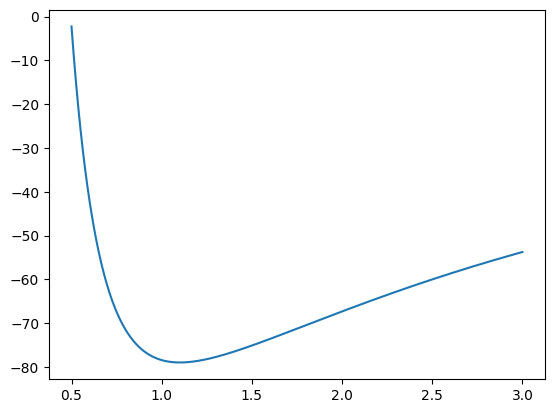

In [10]:

plt.plot(subspace.params[0],subspace.energy_levels[:,0])
plt.show()